# Chapter 5 – SciPy等模块的金融场景

## 5.1 Scipy模块

In [1]:
import scipy
scipy.__version__

'1.13.0'

### 5.1.1 求积分

| 子模块名称   | 功能                         |
| ------------ | ---------------------------- |
| cluster      | 聚类算法                     |
| constants    | 物理数学常数                 |
| ffpack       | 快速傅里叶变换               |
| integrate    | 积分和常微分方程求解         |
| interpolate  | 插值处理                     |
| io           | 输入输出                     |
| linalg       | 线性代数                     |
| ndimage      | 多维图像处理模块             |
| odr          | 正交距离回归                 |
| optimize     | 优化和求根                   |
| signal       | 信号处理                     |
| sparse       | 稀疏矩阵                     |
| spatial      | 空间数据结构和算法           |
| special      | 特殊函数模块                 |
| stats        | 统计分布和函数               |
| weave        | 调用C/C++                    |

在对复杂的金融产品进行估值时，会经常用到积分。下面，就以金融领域最常用的标准正态分布作为示例介绍如何通过SciPy求解积分。在统计学中，如果随机变量x服从标准正态分布，则它的概率密度函数是：  
$$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}
$$
假定需要计算变量x处区间[a,b]的概率，具体就是对公式（6-1）求以下积分
$$
\int_a^b f(x) \, dx = \int_a^b \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} dx
$$
【例6-1】假定变量是服从标准正态分布，需要计算当该变量处于区间[-1,1]的概率，通过SciPy模块求解，具体的计算分为两个步骤。   
第1步：导入SciPy的子模块 integrate，并且在Python中自定义一个标准正态分布的概率密度函数，具体的代码如下：


In [2]:
import scipy.integrate as sci  #导入SciPy的子模块integrate
def f(x):
    import numpy as np #导入Numpy模块
    return 1/pow(2*np.pi,0.5)*np.exp(-0.5*x**2) #输出标准正态分布的函数概率密度的表达式

第2步：在integrate子模块中，有多个求解积分的函数，函数形式及主要参数如下：
函数（func,a,b）
其中，func表示被积函数，a是区间的下限，b是区间的上限；具体的函数及针对例6-1
的代码演示见表6-2。   

| 方法        | 功能           | 具体运用                                                | 输出结果                                          |
|-------------|----------------|---------------------------------------------------------|---------------------------------------------------|
| quad        | 自适应求积分   | `sci.quad(func=f, a=-1.0, b=1.0)`                       | (0.682689492137086, 7.579375928402476e-15)        |
| fixed_quad  | 固定高斯求积   | `sci.fixed_quad(func=f, a=-1.0, b=1.0)`                 | (0.6826897353882191, None)                        |
| quadrature  | 自适应高斯求积分 | `sci.quadrature(func=f, a=-1.0, b=1.0)`                | (0.6826894922280757, 5.174690009823735e-09)       |
| romberg     | 自适应龙贝格求积分 | `sci.romberg(function=f, a=-1.0, b=1.0)`              | 0.6826894921481355                                |


### 5.1.2 插值法

通过导入SciPy的子模块interpolate可以进行插值运算，并且最常用的是一维数据的插值计算，需要通过函数interpld完成。该函数的主要格式和参数如下：   
interpld(x,y,kind)   
其中，x和y是一系列已知的数据点，并且有y=f(x)的函数关系式；kind代表了求插值的具体方法，常用的方法见表6-3：

| 参数名称   | 对应的插值方法                       |
|------------|--------------------------------------|
| nearest    | 最邻近插值法                         |
| zero       | 阶梯插值法，即0阶样条曲线插值法      |
| slinear    | 线性插值法，即1阶样条曲线插值法      |
| quadratic  | 2阶样条曲线插值法                    |
| cubic      | 3阶样条曲线插值法                    |


【例6-2】以2018年12月28日的远期国债到期收益率作为例子，远期国债到期收益率的信息如表6-4所示，考虑到表中缺少2年期、4年期的远期国债收益率，因此需要通过插值法得到相关的收益率。

| 期限       | 0.25年  | 0.5年   | 0.75年  | 1年     | 3年     | 5年     |
|------------|---------|---------|---------|---------|---------|---------|
| 远期收益率 | 2.7344% | 2.7898% | 2.8382% | 2.882%  | 3.0414% | 3.1746% |


nearest [0.27344 0.27898 0.28382 0.2882  0.2882  0.30414 0.30414 0.31746]
zero [0.27344 0.27898 0.28382 0.2882  0.2882  0.30414 0.30414 0.31746]
slinear [0.27344 0.27898 0.28382 0.2882  0.29617 0.30414 0.3108  0.31746]
quadratic [0.27344    0.27898    0.28382    0.2882     0.29879098 0.30414
 0.31036301 0.31746   ]
cubic [0.27344    0.27898    0.28382    0.2882     0.29937206 0.30414
 0.30825294 0.31746   ]


Text(0.5, 1.0, '用插值法求2年期和4年期的远期国债到期收益率')

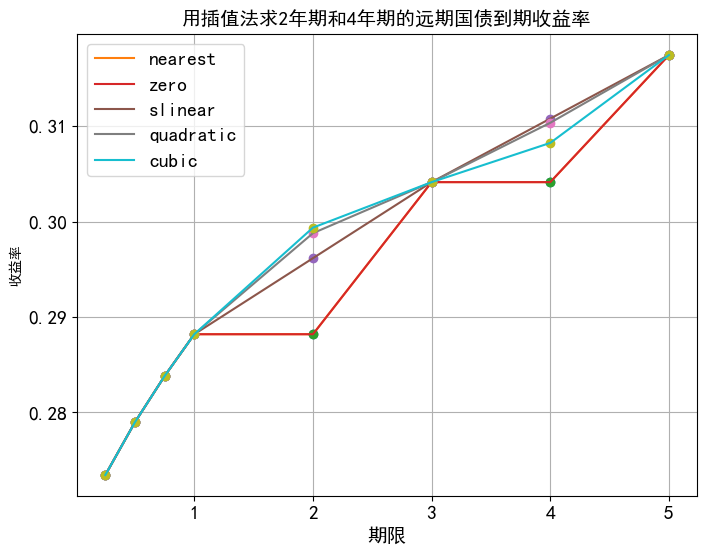

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
from scipy import interpolate #导入SciPy的子模块interpolate
t=np.array([0.25,0.5,0.75,1.0,3.0,5.0]) #生成仅包含已有期限的数组
t_new=np.array([0.25,0.5,0.75,1.0,2.0,3.0,4.0,5.0]) #生成包括2年和4年的新数组
rates=np.array([0.27344,0.27898,0.28382,0.2882,0.30414,0.31746]) #生成仅包含已有利率的数组
types=['nearest','zero','slinear','quadratic','cubic'] #生成包含插值方法的列表
plt.figure(figsize=(8,6))
for i in types: #用for循环计算不同插值方法的结果并输出
    f=interpolate.interp1d(x=t,y=rates,kind=i)
    rates_new=f(t_new)
    print(i,rates_new)
    plt.plot(t_new,rates_new,'o')
    plt.plot(t_new,rates_new,'-',label=i)
    plt.xticks(fontsize=14)
    plt.xlabel(u'期限',fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel(u'收益率',rotation=90)
    plt.legend(loc=0,fontsize=14)
    plt.grid()
plt.title(u'用插值法求2年期和4年期的远期国债到期收益率',fontsize=14)

### 5.1.3 求解方程组

【例6-3】沿用3.1节例3-1的相关股票信息：除了已知在2018年9月3日至9月6日每只股票的涨跌幅以外，同时也已知整个投资组合的收益率（见表6-5的最后一列）。假定在这些交易日，投资组合中每只股票的权重保持不变，根据这些已知的信息求解这4只股票在整个投资组合中所占的权重。

| 日期         | 中国石油  | 工商银行  | 上汽集团  | 宝钢股份   | 投资组合收益率   |
|--------------|-----------|-----------|-----------|------------|------------------|
| 2018-09-03   | 0.3731%   | -0.1838%  | -0.3087%  | -2.4112%   | -0.105654%       |
| 2018-09-04   | 2.1066%   | 0.1842%   | -0.0344%  | 1.1704%    | 0.70534%         |
| 2018-09-05   | -0.4854%  | -1.6544%  | -3.3391%  | -2.9563%   | -2.56367%        |
| 2018-09-06   | 0.6098%   | -0.3738%  | 0.7123%   | -1.4570%   | -0.38289%        |


求解方程组是一项比较繁琐的工作，但是运用SciPy子模块linalg就可以轻松求解线性方程组，需要调用函数solve，该函数的格式和参数如下：  
Solve(a,b)  
其中，参数a必须是N行、N列的数组，相当于是方程组等号左边的系数矩阵，b是包括N个元素的一维数组，相当于是方程组等号右边的矩阵。下面,就运用 solve函数求解例6-3中4只股票的权重，具体的代码如下：


In [4]:
from scipy import linalg #导入SciPy的子模块linalg
stock_return=np.array([[0.003731,-0.001838,-0.003087,-0.024112],[0.021066,0.001842,-
0.000344,0.011704],[-0.004854,-0.016544,-0.033391,-0.029563], [0.006098,-
0.003738,0.007123,-0.01457]]) #创建包含4只股票涨跌幅的数组
port_return=np.array([-0.0105654,0.0070534,-0.0256367,-0.0038289]) #创建投资组合收益率的数组
weight=linalg.solve(a=stock_return,b=port_return) #计算每只股票的权重
stock=np.array(['中国石油','工商银行','上汽集团','宝钢股份'])
for i in range(0,4):
    print(stock[i],round(weight[i],2))

中国石油 0.1
工商银行 0.2
上汽集团 0.3
宝钢股份 0.4


同时，对于例6-3也可以运用SciPy的子模块optimize中的fsolve函数求解，该函数的格式如下：  
fsolve(func,x0)  
其中，func代表求解的方程式，需要通过def自定义；x0表示初始猜测的方程组的解，该函数在后面第7章讨论债券零息利率曲线时会发挥很大的作用。下面针对例6-3，运用 fsolve函数演示具体的求解过程，具体的代码如下：

In [5]:
def g(w): #定义求解每只股票权重的方程组
    w1,w2,w3,w4 = w
    eq1=0.003731*w1-0.001838*w2-0.003087*w3-0.024112*w4+0.0105654 #第一个等于0的方程式
    eq2=0.021066*w1+0.001842*w2-0.000344*w3+0.011704*w4-0.0070534 #第二个等于0的方程式
    eq3=-0.004854*w1-0.016544*w2-0.033391*w3-0.029563*w4+0.0256367 #第三个等于0的方程式
    eq4=0.006098*w1-0.003738*w2+0.007123*w3-0.01457*w4+0.0038289 #第四个等于0的方程式
    return [eq1,eq2,eq3,eq4]
import scipy.optimize as sco #导入SciPy的子模块optimize
result=sco.fsolve(g,[0.01,0.01,0.01,0.01]) #求方程组的解
result

array([0.1, 0.2, 0.3, 0.4])

### 5.1.4 最优化

【例6-4】假定一家投资机构拟配置4只A股股票，分别是贵州茅台、工商银行、上汽集团、宝钢股份，表6-6列出了这4只股票的相关信息。该投资机构的资金为1亿元，以12月28日的收盘价投资，希望实现投资组合收益率的最大化，同时要求整个投资组合的贝塔值不超过1.4，此外，每只股票不允许卖空，需计算应该配置的每只股票权重和股数。

| 证券简称 | 平均年化收益率 | 收盘价（2018年12月28日） | 股票贝塔值 |
|------------|-------------------|-------------------------------|-------------|
| 贵州茅台   | 34.9032%          | 590.01                        | 1.64        |
| 工商银行   | 15.5143%          | 5.29                          | 1.41        |
| 上汽集团   | 13.2796%          | 26.67                         | 1.21        |
| 宝钢股份   | 5.5905%           | 6.50                          | 1.06        |

In [6]:
# 第1步：计算每只股票的最优投资权重，具体的代码如下：
import scipy.optimize as sco #导入SciPy的子模块optimize
P=np.array([590.01,5.29,26.67,6.50]) #输入股票价格
R=np.array([0.349032,0.155143,0.132796,0.055905]) #输入股票收益率
b=np.array([1.64,1.41,1.21,1.06]) #输入股票贝塔值
def f(w): #定义求最优值得函数
    w=np.array(w)
    return -np.sum(R*w)
cons=({'type':'eq', 'fun': lambda w: np.sum(w)-1},{'type':"ineq",'fun':lambda w: 1.4-
np.sum(w*b)})
bnds=((0,1),(0,1),(0,1),(0,1))
result=sco.minimize(f,[0.25,0.25,0.25,0.25], method="SLSQP", bounds=bnds,constraints=cons) #计算最优的解
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.22804894822767985
       x: [ 5.119e-01  2.220e-16  2.872e-01  2.008e-01]
     nit: 4
     jac: [-3.490e-01 -1.551e-01 -1.328e-01 -5.590e-02]
    nfev: 20
    njev: 4

In [7]:
# 第2步：根据每只股票的最优投资权重，计算得到该投资组合的收益率，具体的代码如下：
result['x'].round(3)

array([0.512, 0.   , 0.287, 0.201])

In [8]:
# 第3步：计算投资组合的收益率最大时，购买每只股票的股票数量，具体的代码如下：
shares=100000000*result["x"]/P
shares=shares.round(0) #结果去整数，因为最少是1股
print('贵州茅台的股数:',shares[0])
print('工商银行的股数:',shares[1])
print ('上汽集团的股数:',shares[2])
print('宝钢股份的股数:',shares[3])


贵州茅台的股数: 86765.0
工商银行的股数: 0.0
上汽集团的股数: 1077018.0
宝钢股份的股数: 3089828.0


### 5.1.5 统计功能

【例6-6】沿用5.5节例5-8中运用的沪深300指数和上证180指数2016年至2018年的日涨跌幅数据，用于演示子模块stats中的统计函数及其用法，具体代码如下：

In [9]:
import scipy.stats as st
import pandas as pd
HS300_sz180 = pd.read_excel(r'FigureData\data\chapter5\沪深300指数与上证180指数的日涨跌幅（2016-2018）.xlsx',header=0,index_col=0) #注意导入的是sheet1
HS300_sz180.describe()

,沪深300涨跌幅,上证180涨跌幅
count,731.000000,731.000000
mean,-0.000223,-0.000154
std,0.011826,0.011400
min,-0.070206,-0.067217
25%,-0.005144,-0.004876
50%,0.000350,0.000126
75%,0.005075,0.005022
max,0.043167,0.041031


In [10]:
st.describe(HS300_sz180) # 描述性统计信息

DescribeResult(nobs=731, minmax=(array([-0.07020589, -0.06721739]), array([0.04316748, 0.04103086])), mean=array([-0.00022295, -0.00015435]), variance=array([0.00013986, 0.00012996]), skewness=array([-1.04965359, -1.05201293]), kurtosis=array([6.21642174, 6.47677757]))

In [11]:
st.kurtosis(HS300_sz180) # 峰度

array([6.21642174, 6.47677757])

In [12]:
st.moment(HS300_sz180,moment=2) # n阶矩

array([0.00013967, 0.00012978])

In [13]:
st.mode(HS300_sz180) # 众数

ModeResult(mode=array([-0.07020589, -0.06721739]), count=array([1., 1.]))

In [14]:
st.skew(HS300_sz180) # 偏度

array([-1.04965359, -1.05201293])

## 5.2 StatsModels模块

Stats Models模块最早起源于SciPy子模块stats中的models工具包，最初由Jonathan Taylor编写，但后来从SciPy中被移除了。然而，在2009年的谷歌代码夏季峰会（Google Summer of Code）期间，经过修正、测试、改进并最终以全新的独立模块Stats Models对外发布。此后，StatsModels的开发团队不断添加新模型、绘图工具和统计方法，使得它最终成为了一款功能强大的统计分析工具，详细的功能介绍可以访问官方网站进行查询。

In [15]:
import statsmodels #导入StatsModels模块
statsmodels.__version__

'0.14.1'

本书中，运用Stats Model模块主要是解决线性回归的问题，因此本节的讨论侧重于如何运用该模块进行线性回归，具体可以分为以下若干步骤。  
第1步：导入 Stats Models的子模块api；  
第2步：除了导入相关的因变量（被解释变量）、自变量（解释变量）的数据以外，还需要对自变量的数据增加一列常数项；  
第3步：构建相关的线性回归模型，在这一步中，可以根据需要运用不同的线性回归模型，具体的模型类别和对应的函数如表6-11所示。   
第4步：用fit函数生成一个线性回归的结果对象，结果对象包含了回归模型的结果参数和模型诊断信息。 
  
| 函数     | 模型类型                                       |
|---------|------------------------------------------------|
| OLS     | 普通最小二乘法回归（ordinary least square regression） |
| GLS     | 广义最小二乘法回归（generalized least squares regression） |
| WLS     | 加权最小二乘法回归（weighted least square regression） |
| GLASAR  | 带有自相关误差模型的广义最小二乘法回归（GLs with autoregressive errors model） |
| GLM     | 广义线性模型（generalized linear models）       |
| RLM     | 使用M个估计量的鲁棒线性模型（robust linear models using M estimators） |
| mixed   | 混合效应模型（mixed effects models）            |
| gam     | 广义加性模型（generalized additive models）      |


【例6-12】以2016年至2018年期间工商银行A股股价涨跌幅作为因变量，沪深300指数的涨跌幅作为自变量，构建普通最小二乘法回归模型，具体分为两个步骤完成。  
第1步：导入数据并计算普通最小二乘法回归模型的结果，具体的代码如下

In [16]:
import statsmodels.api as sm #导入StatsModels的子模块api
ICBC_HS300=pd.read_excel(r'FigureData\data\chapter6\工商银行与沪深300指数.xlsx',sheet_name='Sheet1',header=0,index_col=0) #导入外部数据
ICBC_HS300=ICBC_HS300.dropna() #删除缺失值
Y=ICBC_HS300.iloc[:,0]
X=ICBC_HS300.iloc[:,1]
X_addcons=sm.add_constant(X) 
model=sm.OLS(endog=Y,exog=X_addcons) #构建普通最小二乘法的线性回归模型
result=model.fit() #生成一个线性回归的结果对象
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ICBC   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     281.2
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.29e-53
Time:                        11:23:27   Log-Likelihood:                 2302.7
No. Observations:                 731   AIC:                            -4601.
Df Residuals:                     729   BIC:                            -4592.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.521      0.129      -0.000       0.001
HS300          0.5449      0.032     16.768      0.000       0.481       0.609
==============================================================================
Omnibus:                       90.243   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.477
Skew:                           0.451   Prob(JB):                     4.95e-92
Kurtosis:                       6.604   Cond. No.                         84.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22500\2361535239.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(X,result.params[0]+result.params[1]*X,'r-',lw=2.5) #生成拟合的一条直线


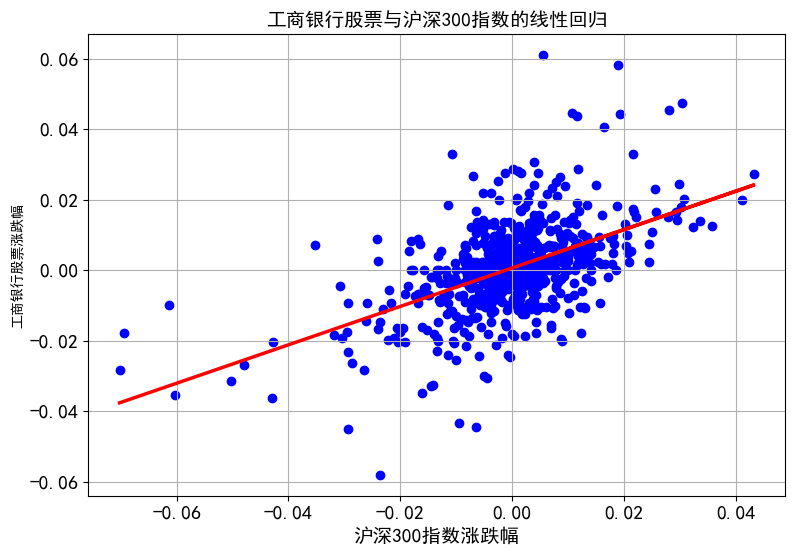

In [17]:
# 第2步：对线性回归模型进行可视化，具体的代码如下：
import matplotlib
import matplotlib.pyplot as plt
import pylab as mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(9,6))
plt.scatter(X,Y,c="b",marker="o")
plt.plot(X,result.params[0]+result.params[1]*X,'r-',lw=2.5) #生成拟合的一条直线
plt.xticks(fontsize=14)
plt.xlabel(u'沪深300指数涨跌幅',fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel(u'工商银行股票涨跌幅',rotation=90)
plt.title(u'工商银行股票与沪深300指数的线性回归',fontsize=14)
plt.grid()

## 5.3 波动率模型与arch模块

In [18]:
import arch
arch.__version__

'7.0.0'

在arch模块中，构建ARCH模型和GARCH模型需要运用到arch_model函数，该函数的形式如下：   
arch_model（y, x, mean, lags, vol, p, o, q, dist)   

| 参数名称 | 功能和用法                                   |
|----------|---------------------------------------------|
| y        | 因变量，即拟分析的波动率变量的样本值          |
| x        | 外生变量（Exogenous regressors）。如果未输入则模型自动省略 |
| mean     | 均值模型的类型。可选类型包括：            |
|          | - 'Constant': 表示平均方差是一个常数           |
|          | - 'Zero': 表示平均方差是零                      |
|          | - 'ARX': 表示带外生变量的自回归模型（AutoRegressive eXogenous, ARX） |
| lags     | 滞后项的阶数，默认值为0                       |
| vol      | 波动率模型的类型。可选类型包括：            |
|          | - 'GARCH'（默认）                             |
|          | - 'ARCH'                                      |
|          | - 'EGARCH'                                    |
|          | - 'FIARCH'                                    |
|          | - 'HARCH'                                     |
| p        | 对称随机数的滞后项阶数，默认值为1              |
| o        | 非对称数据的滞后项阶数，默认值为0               |
| q        | 波动率或对应变量的滞后项阶数，默认值为1         |
| dist     | 误差项服从的分布类型。可选类型包括：         |
|          | - 'normal'或'gaussian': 正态分布（默认值）       |
|          | - 't'或'studentst': 学生t分布                  |
|          | - 'skewstudent'或'skewt': 偏态学生t分布         |
|          | - 'ged'或'generalized error': 通用误差分布       |


【例6-13】沿用前面例6-6的相关信息，对2016年至2018年沪深300指数的涨跌幅构建波动率模型，选用的模型是ARCH（1）模型和 GARCH（1，1）模型，具体的过程分为5个步骤。

D:\Anaconda\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001397. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
D:\Anaconda\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001397. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22500\3178352415.py:15: FutureWarning: Series.__getitem__

Iteration:      1,   Func. Count:      5,   Neg. LLF: 727561590.532456
Iteration:      2,   Func. Count:     16,   Neg. LLF: 11356.132171227673
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2231.8659428139513
            Iterations: 3
            Function evaluations: 23
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 10937966039.967566
Iteration:      2,   Func. Count:     20,   Neg. LLF: 296599344854.09015
Iteration:      3,   Func. Count:     34,   Neg. LLF: 10900524247344.074
Iteration:      4,   Func. Count:     49,   Neg. LLF: 2.7653380090984344e+16
Iteration:      5,   Func. Count:     61,   Neg. LLF: 3095743802594.567
Iteration:      6,   Func. Count:     76,   Neg. LLF: 3.8404556109018746e+20
Iteration:      7,   Func. Count:     90,   Neg. LLF: 31495407689.604866
Iteration:      8,   Func. Count:     98,   Neg. LLF: 124253873965163.36
Iteration:      9,   Func. Count:    113,   Neg. LLF: 30

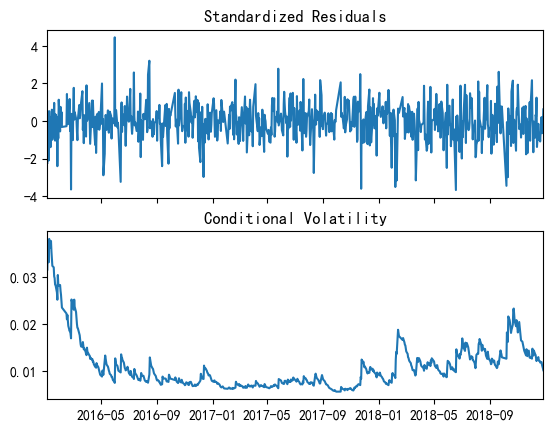

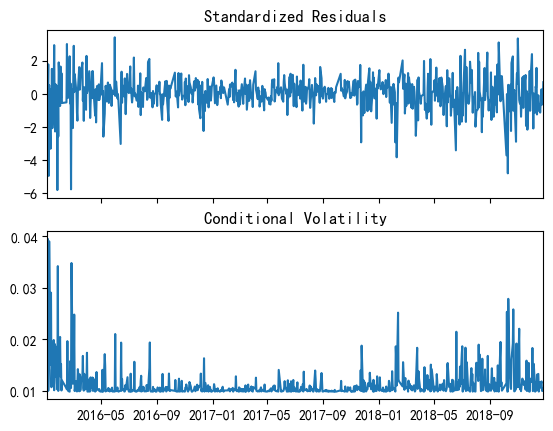

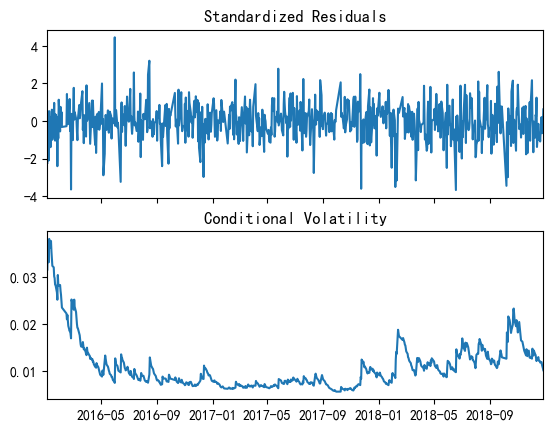

In [19]:
# 第1步：从arch模块中导入 arch_model函数，并且选择相关的参数进行输入，具体的代码如下：
from arch import arch_model #从arch模块中导入arch_model函数
model_arch=arch_model(y=HS300_sz180.iloc[:,0],mean='Constant',lags=0,vol='ARCH',p=1,o=0,q=0,dist='normal') 
#构建ARCH(1)模型
model_garch=arch_model(y=HS300_sz180.iloc[:,0],mean='Constant',lags=0,vol='GARCH',p=1,o=0,q=1,dist='normal')
#构建GARCH(1,1)模型
# 第2步：对ARCH（1）模型进行拟合并且输出模型的参数，具体的代码如下：
result_arch=model_arch.fit() #对ARCH模型进行拟合
result_arch.summary()
# 第3步：对 GARCH（1,1）模型进行拟合并且输出模型的参数，具体的代码如下：
result_garch=model_garch.fit() #对GARCH模型进行拟合
result_garch.summary() #对拟合结果进行输出
# 第4步：可以通过函数 params输出模型的相关参数并且对参数进行运算，具体的代码如下
result_garch.params
vol=np.sqrt(result_garch.params[1]/(1-result_garch.params[2]-result_garch.params[3]))
print('利用GARCH(1,1)模型得到的长期波动率（每日）：',round(vol,4))
# 第5步：将结果进行可视化。运用内嵌的plot函数将标准化残差和条件波动率通过图形方式显示出来（见图6-4和图6-5）。具体的代码如下：
result_arch.plot()
result_garch.plot() 

## 5.4 datetime模块

金融变量的取值往往和时间是密不可分的，在 Python中，有一个内置的专门处理时间的模块datetime，该模块以简单的方式提供日期和时间，不仅支持日期和时间的算法，而且也能实现有效的属性提取并用于格式输出和操作。   
datetime模块主要包含五大类，具体如表6-13所示   

| 类名           | 功能说明                                      |
|----------------|-----------------------------------------------|
| date           | 以日期作为对象，常用的属性包括year（年）、month（月）、day（日） |
| time           | 以时间作为对象，常用的属性包括hour（小时）、minute（分钟）、second（秒）、microsecond（微秒）和tzinfo（时区） |
| datetime       | 以日期和时间作为对象，是date和time的结合          |
| datetime_CAPI  | 以日期时间为对象，是C语言的接口                   |
| timedelta      | 时间间隔，也就是两个不同时点间的长度                |
| tzinfo         | 时区信息对象                                    |


In [20]:
import datetime as dt #导入datetime模块
T1=dt.datetime(2018,12,28)
T1

datetime.datetime(2018, 12, 28, 0, 0)

In [21]:
T2=dt.datetime(2018,8,8,14,38,58,88)
T2

datetime.datetime(2018, 8, 8, 14, 38, 58, 88)

In [22]:
now=dt.datetime.now()
today=dt.datetime.today()
now

datetime.datetime(2024, 5, 23, 11, 23, 49, 393754)

In [23]:
today

datetime.datetime(2024, 5, 23, 11, 23, 49, 393755)

### 5.4.2 访问时间对象的属性

| 属性          | 说明                                                   | 示例代码           |
|--------------|--------------------------------------------------------|-------------------|
| year         | 时间对象的年份                                         | T2.year           |
| month        | 时间对象的月份                                         | T2.month          |
| weekday      | 时间对象处于星期几                                     | T2.weekday()      |
| day          | 时间对象处于当月的日数                                 | T2.day            |
| isocalendar  | 时间对象的以ISO标准化日期的方式显示                    | T2.isocalendar()  |
| date         | 时间对象的小时数                                       | T2.date()         |
| hour         | 时间对象的小时数                                       | T2.hour           |
| minute       | 时间对象的分钟数                                       | T2.minute         |
| second       | 时间对象的秒数                                         | T2.second         |
| microsecond  | 时间对象的微秒数                                       | T2.microsecond    |
| ctime        | 时间对象以字符串方式输出                               | T2.ctime()        |


### 5.4.3 时间对象的运算

| datetime模块内置函数 | Python比较运算符号 | 含义                                | Python的代码           |
|----------------------|-------------------|-------------------------------------|-----------------------|
| \_\_eq\_\_()        | ==                | 等于                                | T1.\_\_eq\_\_(T2)      |
|                      |                   |                                     | T1==T2                |
| \_\_ge\_\_()        | >=                | 大于等于                            | T1.\_\_ge\_\_(T2)      |
|                      |                   |                                     | T1>=T2                |
| \_\_gt\_\_()        | >                 | 大于                                | T1.\_\_gt\_\_(T2)      |
|                      |                   |                                     | T1>T2                 |
| \_\_le\_\_()        | <=                | 小于等于                            | T1.\_\_le\_\_(T2)      |
|                      |                   |                                     | T1<today              |
| \_\_lt\_\_()        | <                 | 小于                                | T2.\_\_lt\_\_(today)   |
|                      |                   |                                     | T2<today              |
| \_\_ne\_\_()        | !=                | 不等于                              | T2.\_\_ne\_\_(today)   |
|                      |                   |                                     | T2!=today             |
| days                 |                   | 计算间隔天数                        | T_delta=T1-T2          |
|                      |                   |                                     | T_delta.days           |
| seconds              |                   | 计算间隔秒数                        | T_delta2=today-T2      |
|                      |                   |                                     | T_delta2.seconds       |
| microseconds        |                   | 计算间隔的微秒数                    | T_delta2.microseconds |
